引入套件

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

保留的原始特征索引: 298
cg05327192


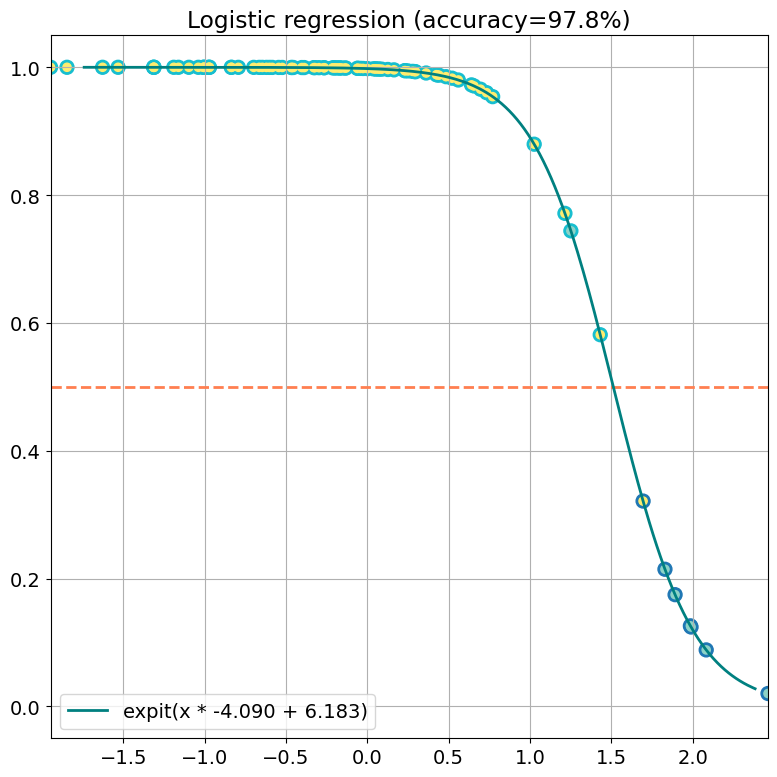

In [6]:


normalized_train = pd.read_csv('../result/all_beta_normalized_train_035.csv')
# print(normalized_train.head(1))
normalized_test = pd.read_csv('../result/all_beta_normalized_test_035.csv')

normalized_train_c = normalized_train[normalized_train['Unnamed: 0'].isin(normalized_test['Unnamed: 0'])]


X_train = normalized_train_c.iloc[:, 1::2]

x = []

for i in range(445):
    X = X_train.iloc[:, i]

    X = X.values.flatten().tolist()

    x.append(X)

y = [ (0 if i < 47 else 1)  for i in range(445)]

x = np.array(x)
dy = np.array(y)

# 只留 1 個特徵
dx = PCA(n_components=1).fit_transform(x)
dx = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = \
          train_test_split(dx, dy, test_size=0.2, random_state=0)
          
pca_model = PCA(n_components=1).fit(x)

# 查看保留的原始特征
original_features = pca_model.components_

# 找到权重最大的索引
max_weight_feature_index = np.argmax(original_features)

# 打印保留的原始特征索引
print("保留的原始特征索引:", max_weight_feature_index)

target_value =normalized_train_c['Unnamed: 0'].iloc[298]

# 打印结果
print(target_value)
# 訓練邏輯斯迴歸並預測結果
model = LogisticRegression()
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
pred_prob = model.predict_proba(dx_test)
test_score = model.score(dx_test, dy_test) * 100
# 繪圖
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'Logistic regression (accuracy={test_score:.1f}%)')
# 訓練集範圍的邏輯斯函數
x = np.linspace(np.amin(dx_train), np.amax(dx_train),
                num=dx_train.size)
y = expit(x * model.coef_[0] + model.intercept_[0])
# 測試集的邏輯斯函數映射
y_t = expit(dx_test * model.coef_[0] + model.intercept_[0])
# y=0.5 分隔線
plt.plot([np.amin(dx_test), np.amax(dx_test)], [0.5, 0.5],
         color='coral', linewidth=2, linestyle='--')
# 訓練集範圍邏輯斯函數
plt.plot(x, y, color='teal', linewidth=2,
         label=f'expit(x * {model.coef_[0][0]:.3f} ' + \
               f'+ {model.intercept_[0]:.3f})')
# 測試集的預測及實際標籤
plt.scatter(dx_test, y_t, c=predict, cmap='tab10', s=100)
plt.scatter(dx_test, y_t, c=dy_test, cmap='Set3', s=35)
plt.legend()
plt.grid(True)
plt.xlim([np.amin(dx_test), np.amax(dx_test)])
plt.ylim([-0.05, 1.05])
plt.tight_layout()
plt.show()